<a href="https://colab.research.google.com/github/nikhilreddybilla28/machine_learning-_pro../blob/master/Copy_of_Binaryclass_using_google_images_(RES34).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning Application in Image Processing under Security Ambit

## Binary classification using Google images 
 Prepared by Nikil Reddy

### ***Tutorial Objectives***: 

*   Get intuition about deep convolutional neural networks (DCNNs).
*   Familiarize with PyTorch
*   Learn and compute gradient descent using  differentiation.
*   Pretrained Network Demonstration: Resnet34
*   Creating your own dataset

This notebook is optionally accelerated with a GPU runtime , if you would like to use this acceleration, please select the menu option
> **"Edit" -> "Notebook settings" -> "Hardware Accelerator" -> "GPU" ->"SAVE"**
                            
 or

 > **"Runtime" -> Change runtime type"-. "Hardware Accelerator" -> "GPU" -> "SAVE"**

In [ ]:
#@title Imports
import fastai 
from fastai.vision import *
from fastai.metrics import error_rate


import numpy as np 
import pandas as pd

# PyTorch packages
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import datasets, transforms

# Plotting packages
import matplotlib.pyplot as plt

###Get a list of URLs

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [ ]:
folder = 'cricket'
file = 'cricket.csv'

In [ ]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/sports/cricket')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

In [ ]:
#@download cricket images
download_images(path/file, dest, max_pics=400)

In [ ]:
folder = 'baseball'
file = 'baseball.csv'

In [ ]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

[PosixPath('data/sports/cricket'),
 PosixPath('data/sports/baseball'),
 PosixPath('data/sports/baseball.csv'),
 PosixPath('data/sports/cricket.csv')]

In [ ]:
download_images(path/file, dest, max_pics=400)

Then we can remove any images that can't be opened:

In [ ]:
classes = ['baseball','cricket']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

baseball


cricket


In [ ]:
path

PosixPath('data/sports')

### DATA

In [ ]:
#@title Load Data
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4)

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (640 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cricket,cricket,cricket,cricket,cricket
Path: data/sports;

Valid: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
baseball,baseball,cricket,baseball,cricket
Path: data/sports;

Test: None

In [ ]:
doc(ImageDataBunch)

In [ ]:
data.classes

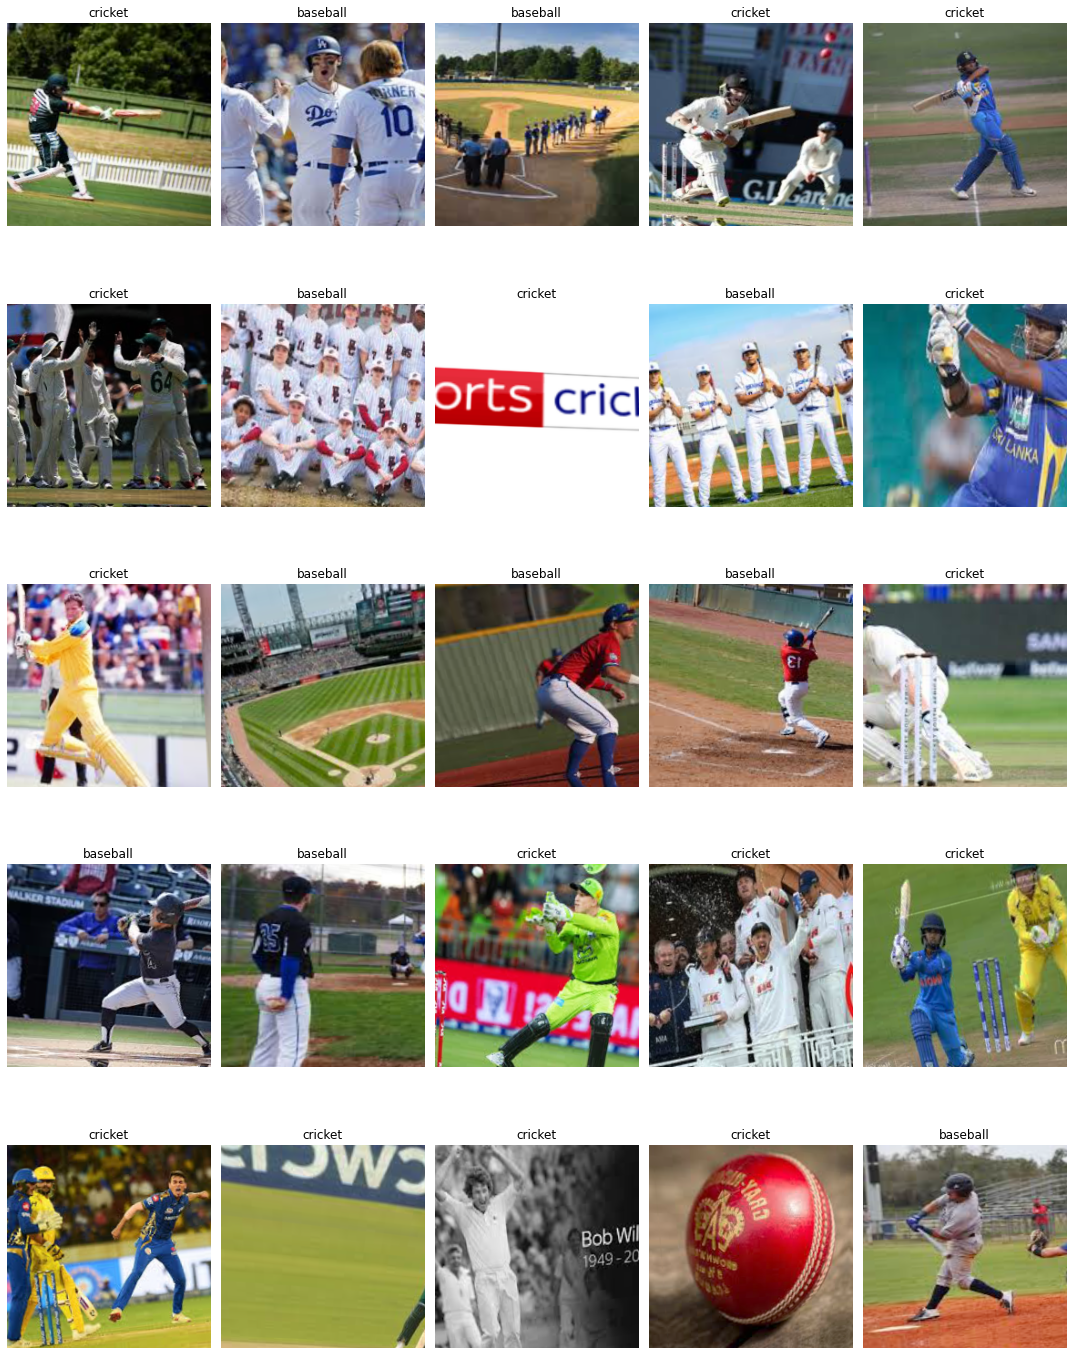

In [ ]:
data.show_batch(rows=5, figsize=(15,20),shuffle=True,seed=0)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baseball', 'cricket'], 2, 640, 160)

####Resnet


[Resnet](https://pabloruizruiz10.com/resources/CNNs/ResNets.pdf)
*   What problems ResNets solve?
*   Architecture

Researchers observed that it makes sense to affirm that “the deeper the better” when it comes to convolutional neural networks. This makes sense, since the models should be more capable (their flexibility to adapt to any space increase because they have a bigger parameter space to explore). However, it has been noticed that after some depth, the performance degrades.
This was one of the bottlenecks of VGG. They couldn’t go as deep as wanted, because they started to lose generalization capability















## Train model

In [ ]:
#@title learner
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [ ]:
doc(cnn_learner)

In [ ]:
learn.loss_func=torch.nn.CrossEntropyLoss()
learn.opt_func=optim.Adam

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.035185,0.400800,0.143750,00:09
1,0.687004,0.299009,0.100000,00:09
2,0.541720,0.299049,0.100000,00:09
3,0.471504,0.293540,0.100000,00:09


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.45E-04


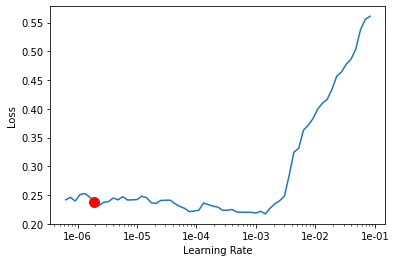

In [ ]:
learn.lr_find();
learn.recorder.plot(suggestion=True)

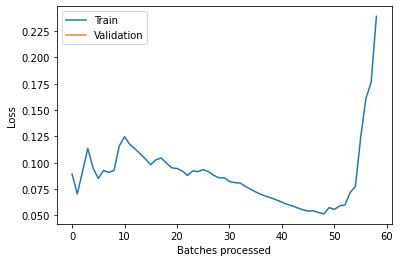

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-6,2e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.319299,0.288899,0.100000,00:09
1,0.260651,0.288304,0.100000,00:09
2,0.253079,0.281034,0.100000,00:09
3,0.241301,0.265976,0.106250,00:09
4,0.237524,0.264076,0.100000,00:09
5,0.243199,0.265578,0.100000,00:09
6,0.228696,0.266958,0.106250,00:09
7,0.210845,0.263801,0.106250,00:09
8,0.212377,0.255096,0.100000,00:09
9,0.209448,0.262540,0.112500,00:09


In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.191190,0.206676,0.087500,00:09
1,0.129758,0.252752,0.050000,00:09
2,0.116299,0.184347,0.062500,00:09
3,0.098566,0.632064,0.143750,00:09
4,0.100732,0.467467,0.068750,00:09
5,0.109330,0.310379,0.062500,00:09
6,0.096057,0.125684,0.031250,00:09
7,0.081836,0.092250,0.018750,00:09
8,0.066173,0.076131,0.018750,00:09
9,0.057465,0.072219,0.018750,00:09


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

## Interpretation

In [ ]:
ip= ClassificationInterpretation.from_learner(learn)

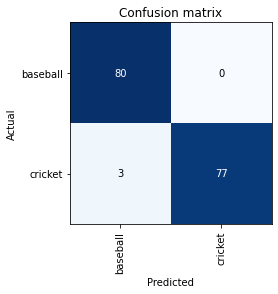

In [ ]:
ip.plot_confusion_matrix()

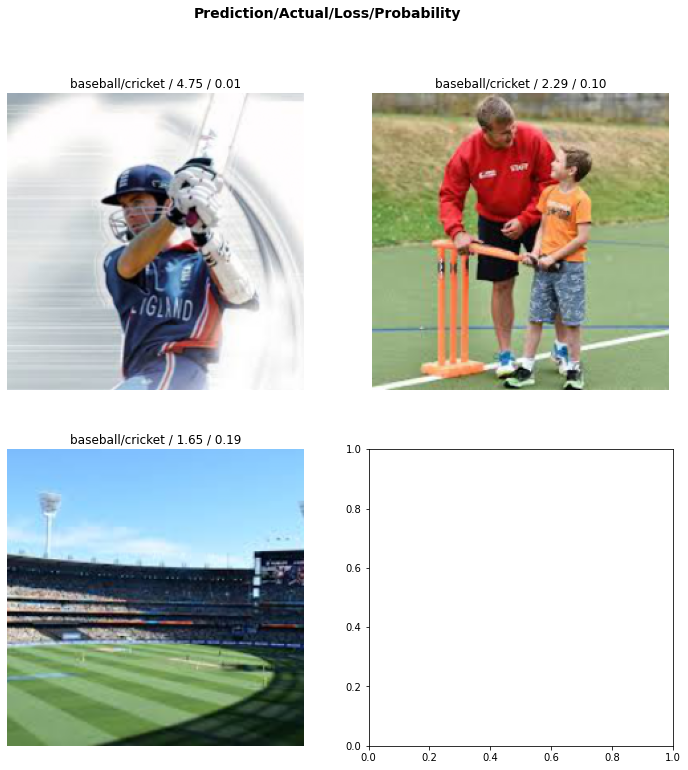

In [ ]:
ip.plot_top_losses(3)

In [ ]:
learn.export()

###Predict

In [ ]:
learn = load_learner(path)

In [ ]:
'''for i in range(1,5):
  p = '/content/data/sports/test'
  pb= p + '/baseball'+str(i)+'.jpeg'
  pc = p + '/cricket'+str(i)+'.jpeg'
  b = open_image(pb)
  show_image(b)
  c = open_image(pc)
  show_image(c)'''

"for i in range(1,5):\n  p = '/content/data/sports/test'\n  pb= p + '/baseball'+str(i)+'.jpeg'\n  pc = p + '/cricket'+str(i)+'.jpeg'\n  b = open_image(pb)\n  show_image(b)\n  c = open_image(pc)\n  show_image(c)"

In [ ]:
tp = Path('/content/data/sports/test')

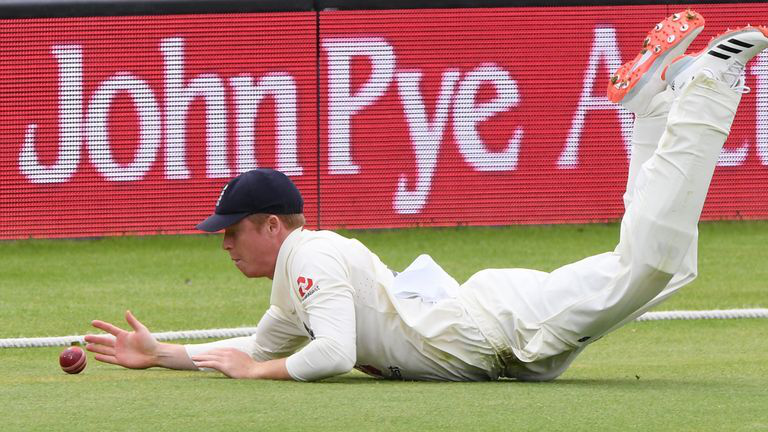

In [ ]:
imgc = open_image(tp/'cricket5.jpeg')
imgc

In [ ]:
pred_class,pred_idx,outputs = learn.predict(imgc)
print(list(outputs))
pred_class.obj

[tensor(0.0374), tensor(0.9626)]


'cricket'

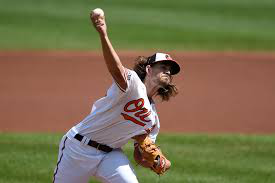

In [ ]:
imgb = open_image(tp/'baseball4.jpeg')
imgb

In [ ]:
pred_class,pred_idx,outputs = learn.predict(imgb)
print(list(outputs))
pred_class.obj


[tensor(1.0000), tensor(2.0232e-05)]


'baseball'

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

Adapted from [fast.ai](https://course.fastai.com) 